In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json

In [9]:
def e_step(x, gamma, theta):
 
    for i in range(len(x)):
        denom = 1 / (np.sqrt(2 * np.pi * theta['sigma2']))
        num = np.exp(-0.5 * (x[i] - theta['mu']) ** 2 / (theta['sigma2']))
        gamma[i] = theta['w'] * denom * num + 1e-8
    return gamma / gamma.sum(1)[..., None]

def m_step(x, gamma, theta):
    theta = {
        'w': gamma.sum(0) / gamma.shape[0],
        'mu': (gamma * x[..., None]).sum(0) / (len(x) * theta['w']),
        'sigma2':  (gamma * ((x[..., None] - theta['mu']) ** 2)).sum(0) / (len(x) * theta['w']),
    }
    return theta


def get_distribution(theta, min_val, max_val, n_points=500):
    x = np.linspace(min_val, max_val, n_points)
    
    y = np.zeros_like(x)
    
    mus = theta['mu']
    sigmas2 = theta['sigma2']
    ws = theta['w']
    
    num = np.exp((-(x[..., None] - mus) ** 2) / (2 * sigmas2))
    denum = np.sqrt(2 * np.pi * sigmas2)
    return x, ((num / denum) * ws).sum(1)


In [10]:
samples = np.array(json.load(open('max_speeds.json')))

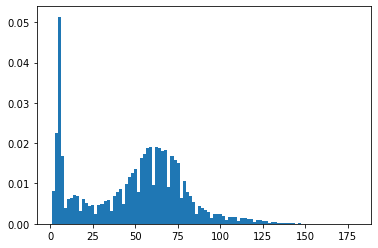

In [11]:
plt.hist(samples, bins=100, density=True);

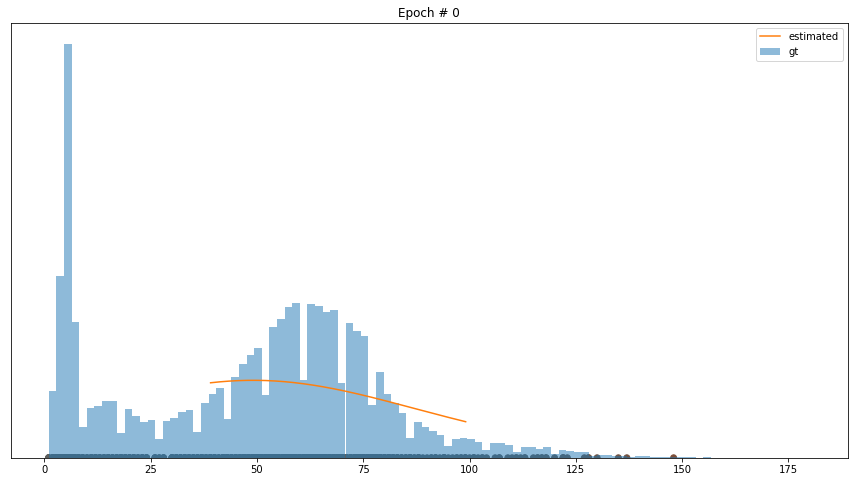

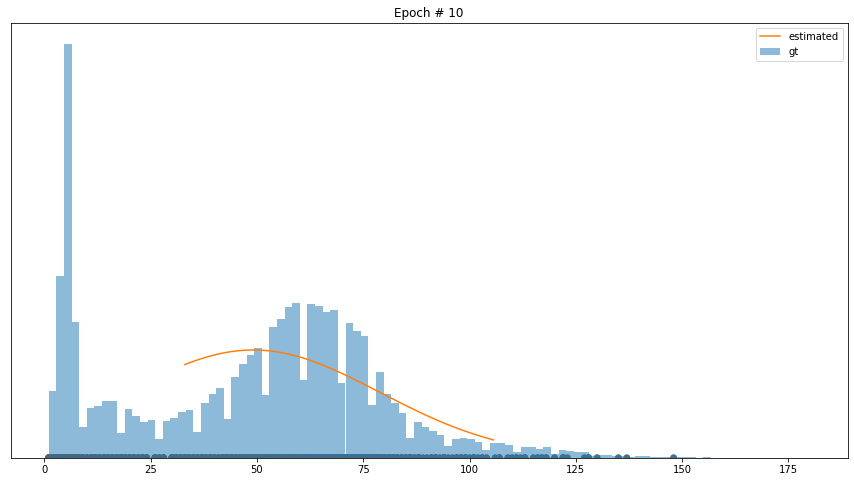

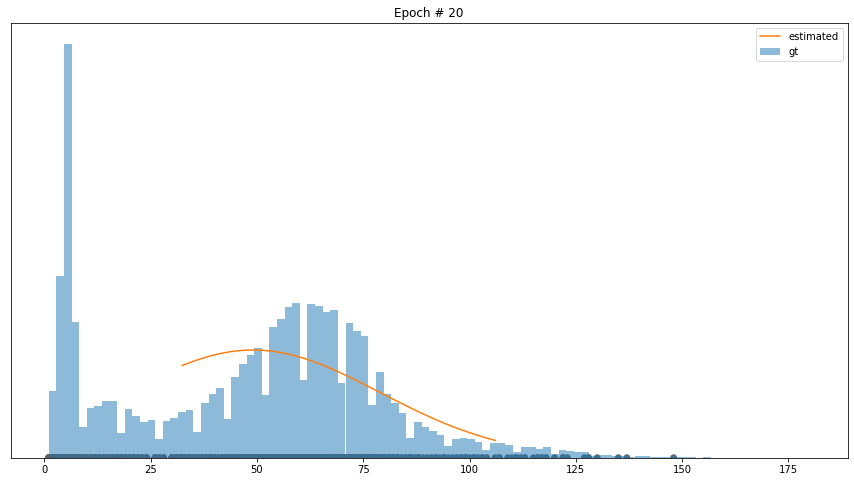

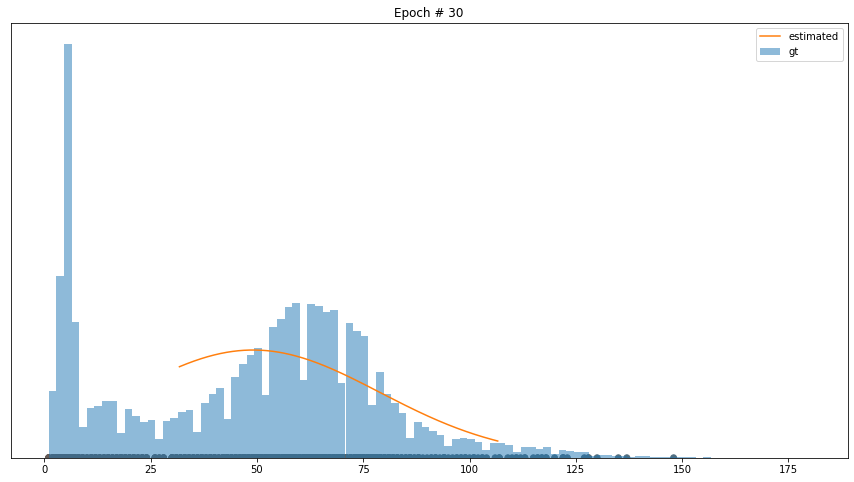

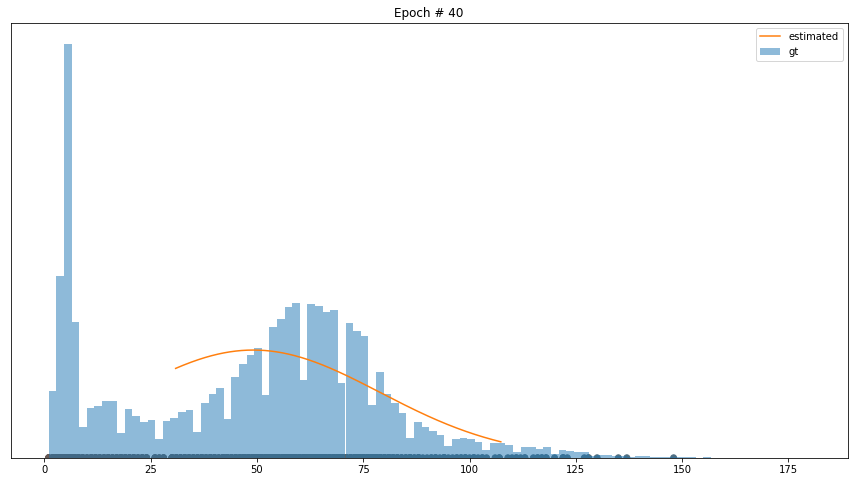

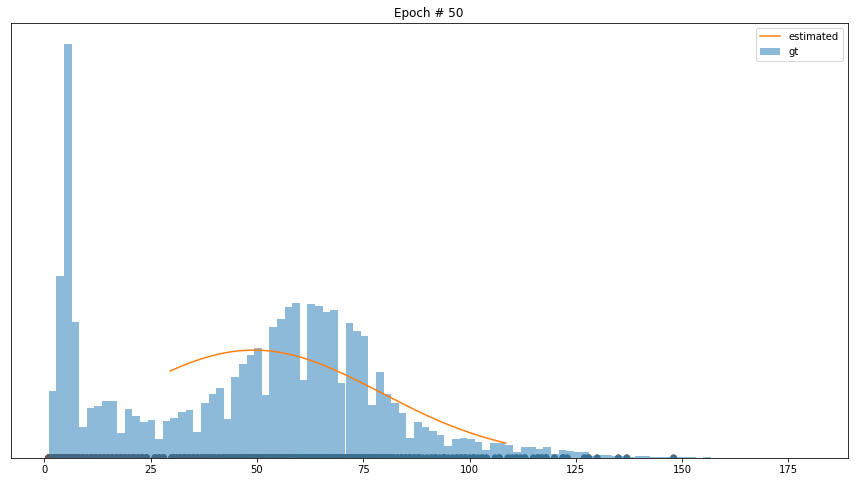

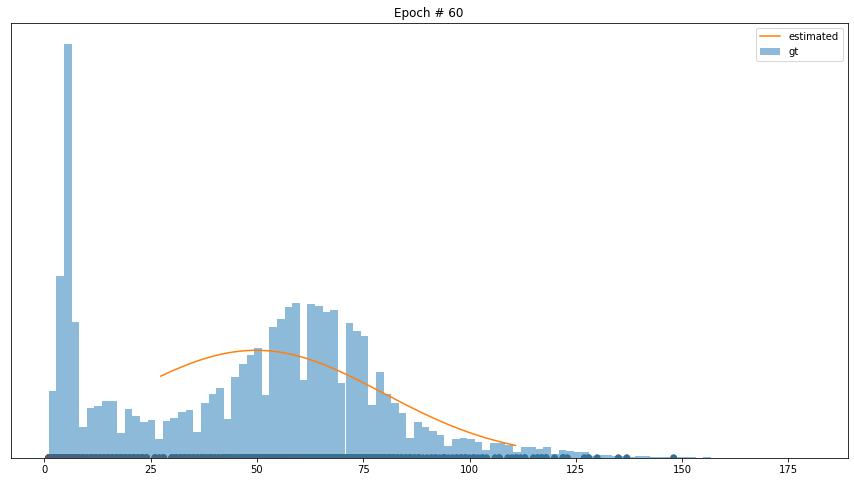

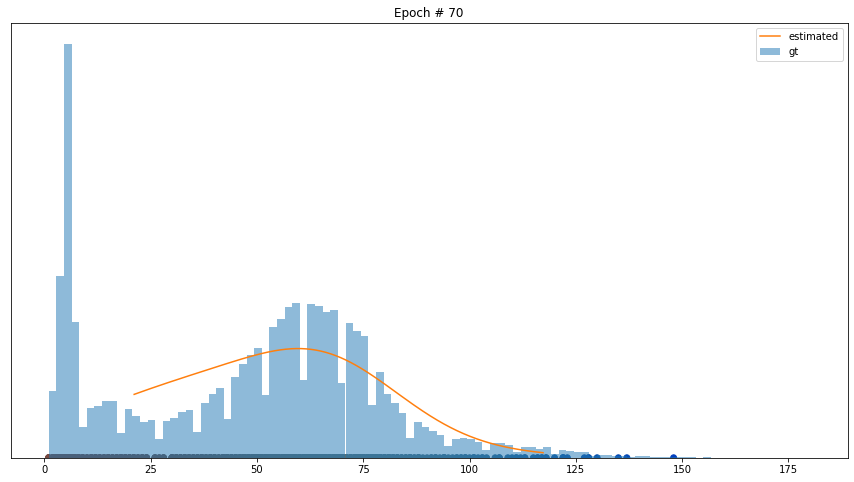

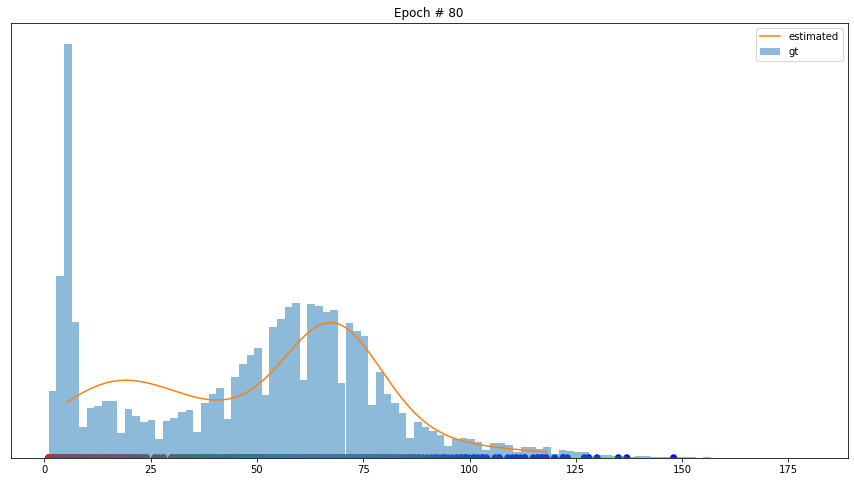

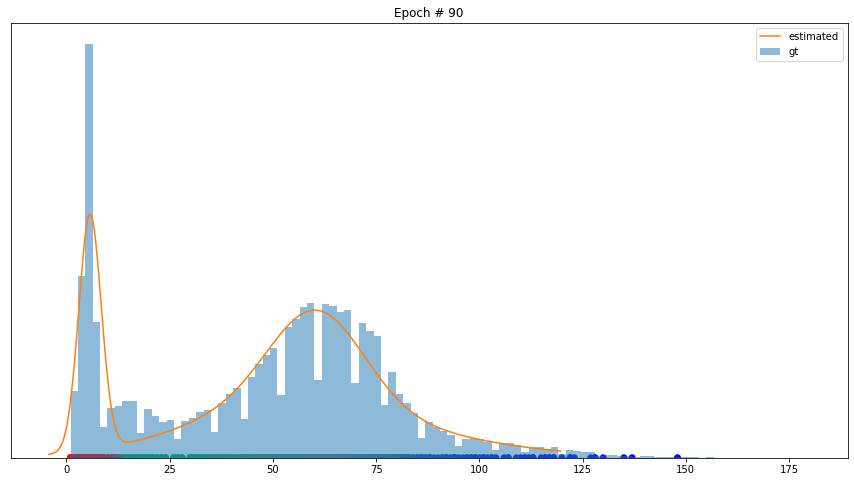

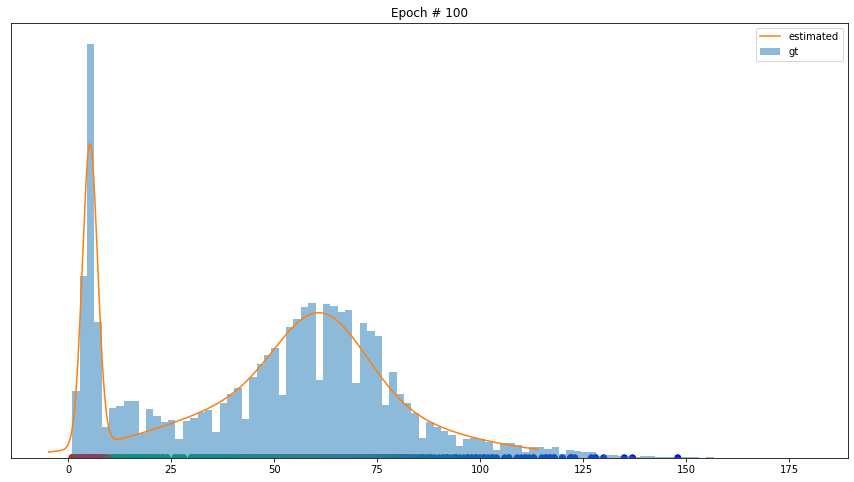

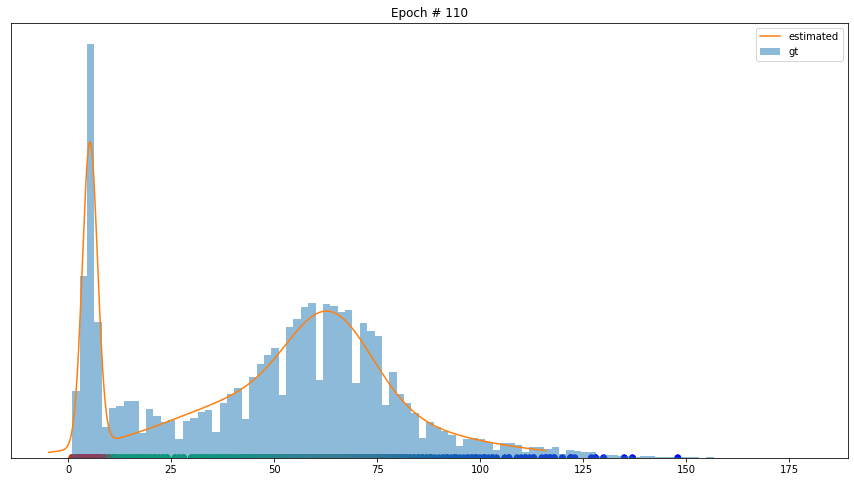

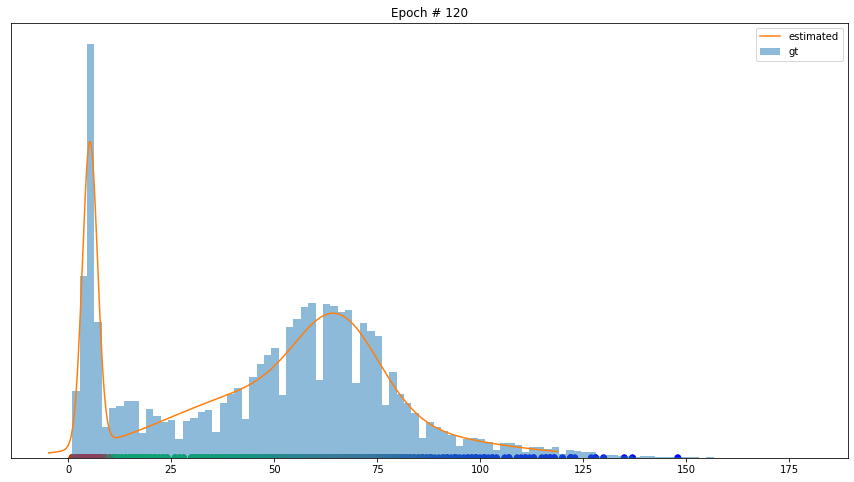

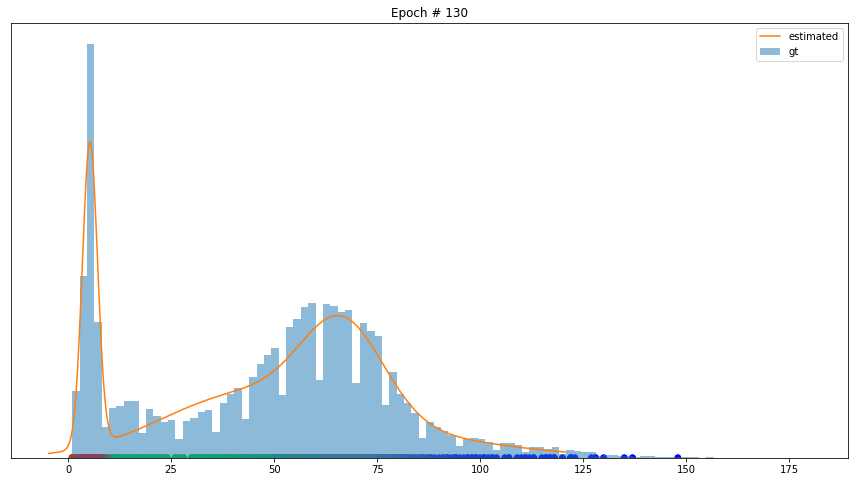

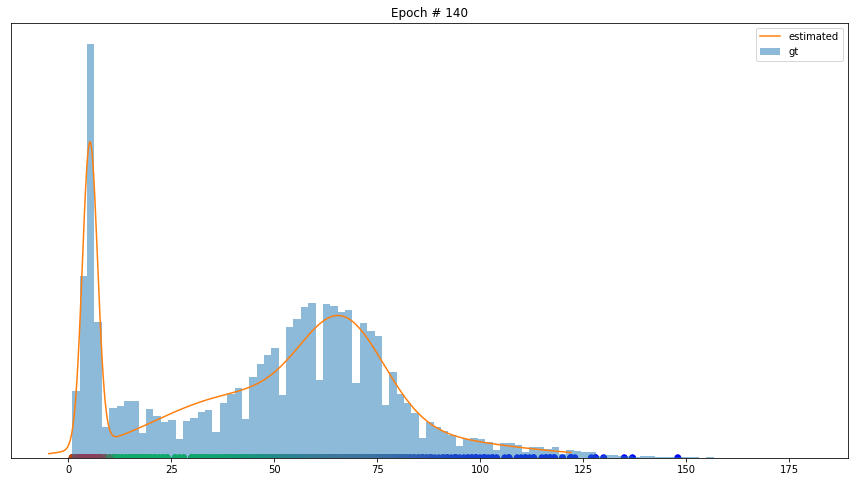

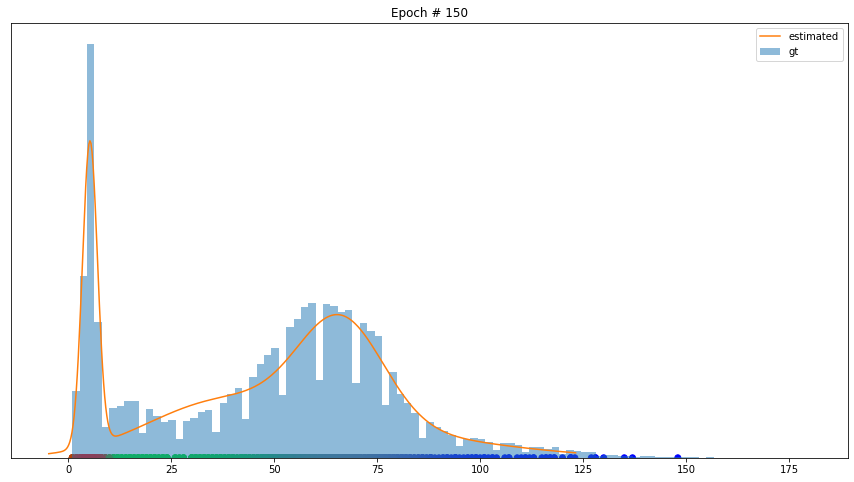

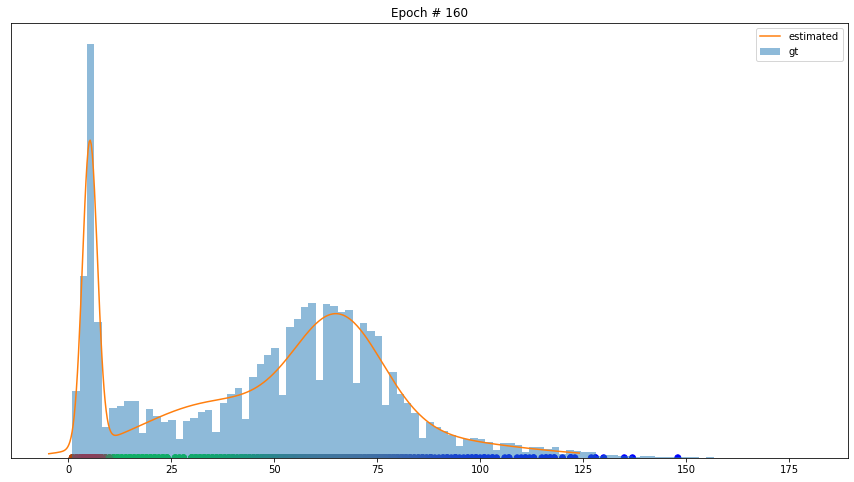

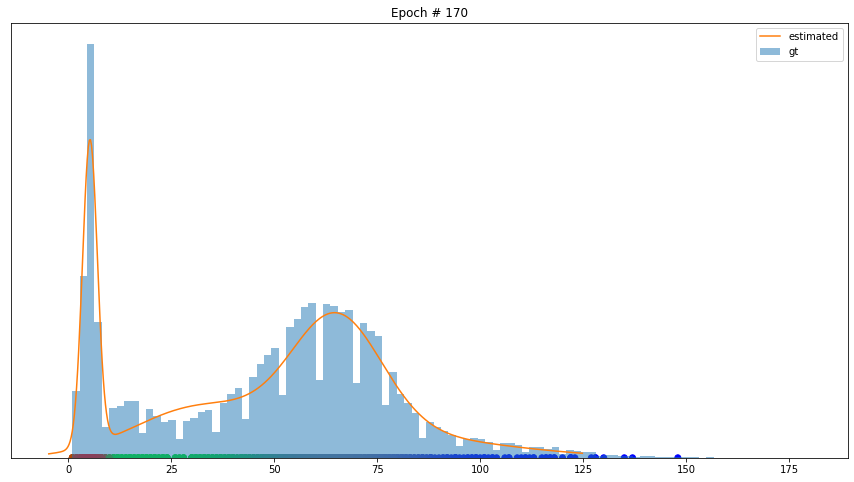

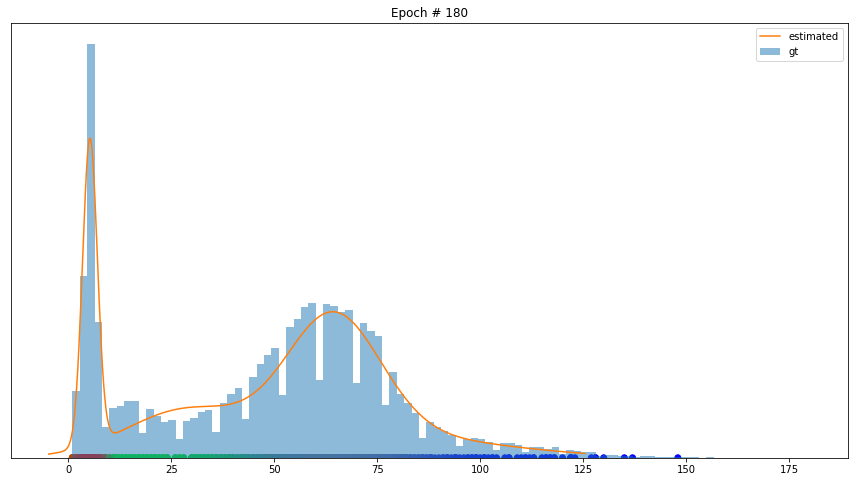

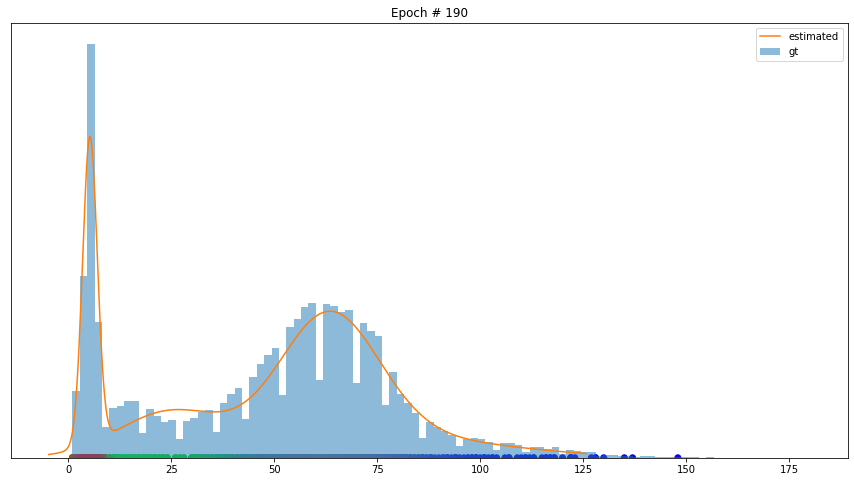

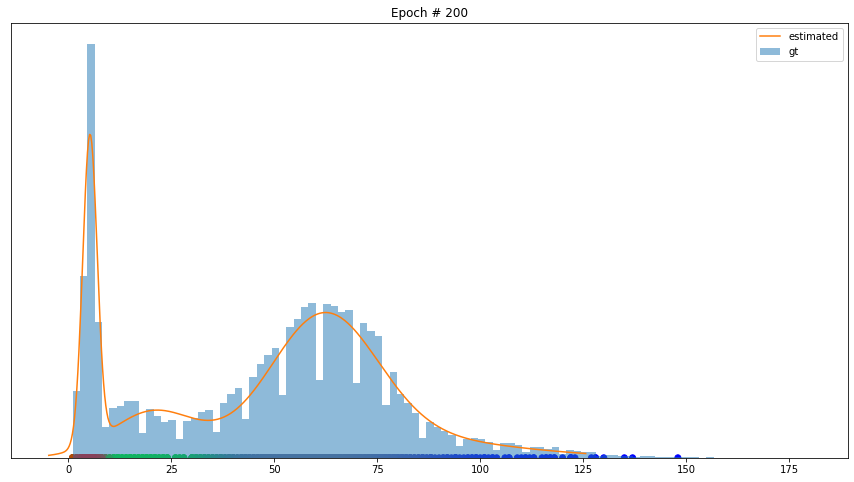

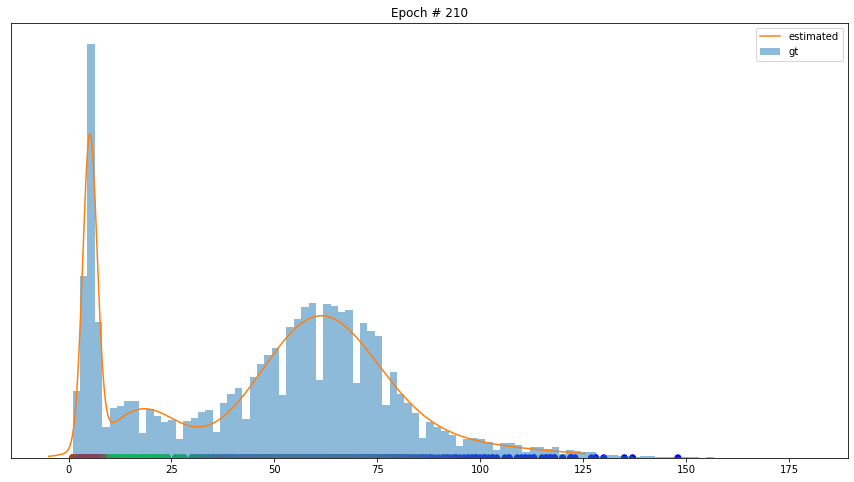

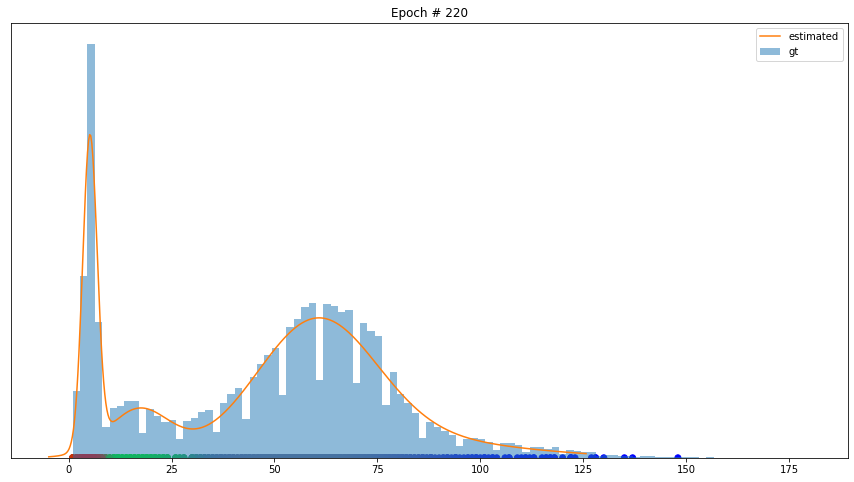

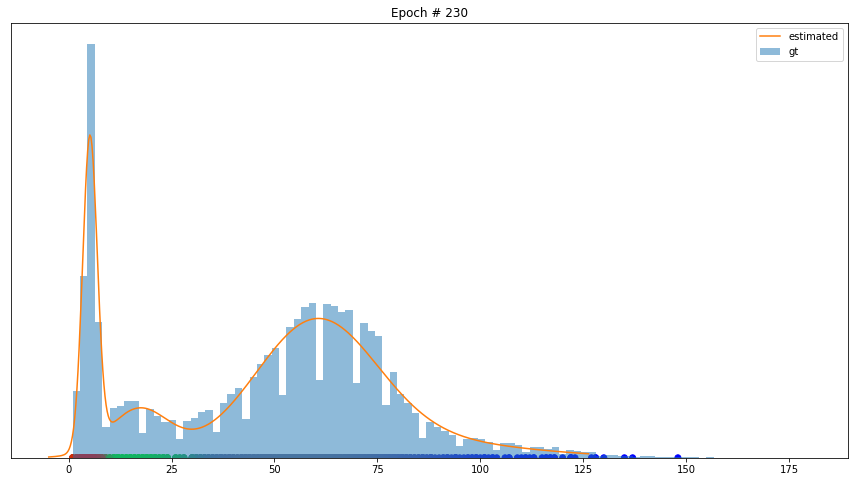

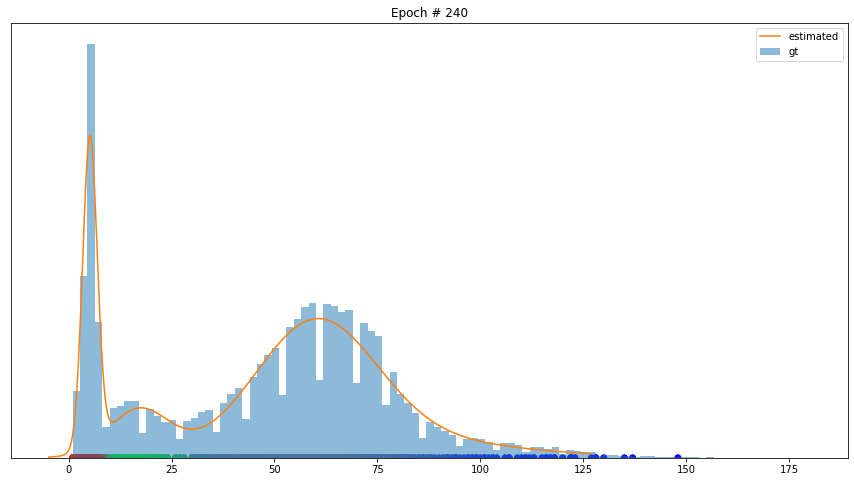

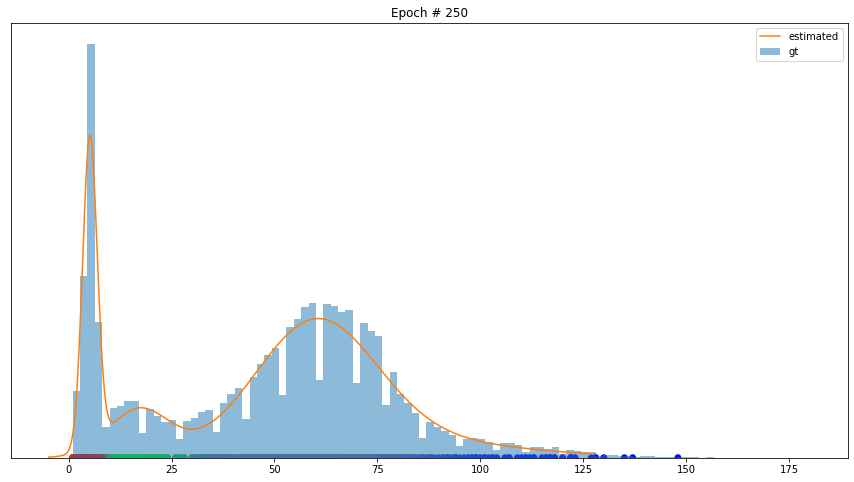

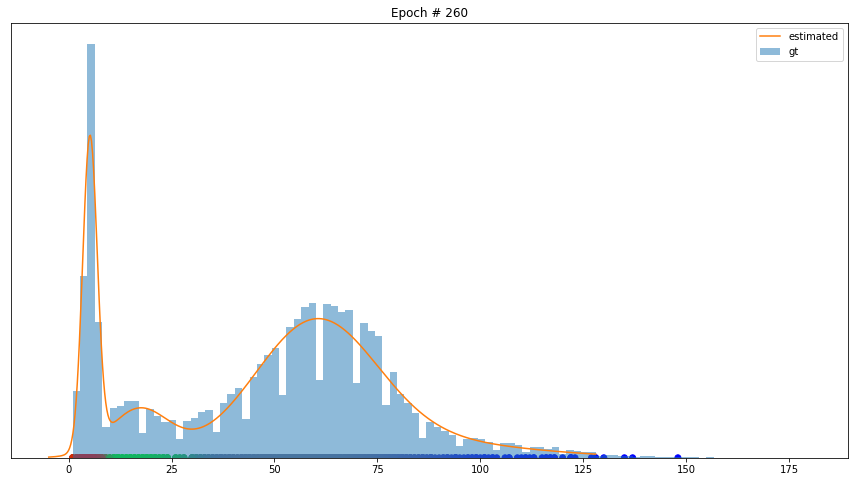

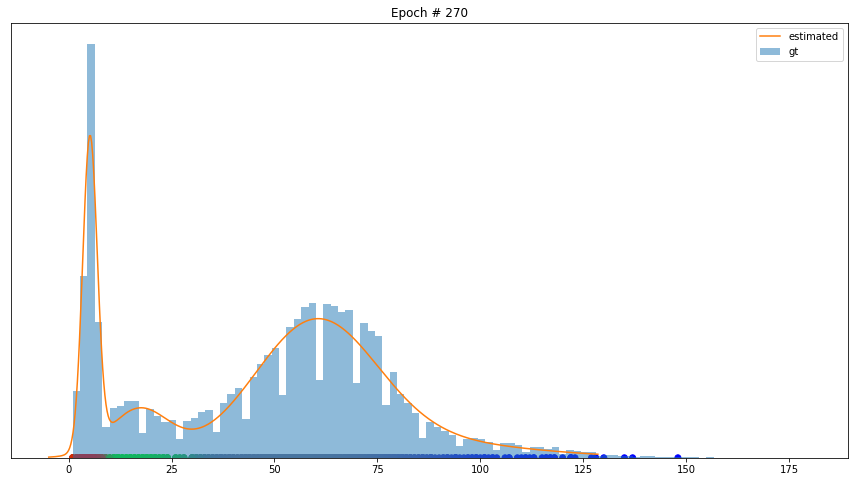

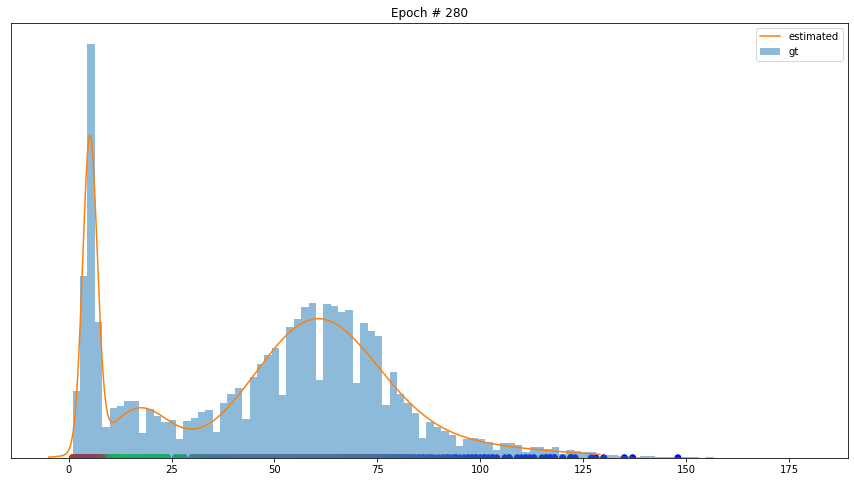

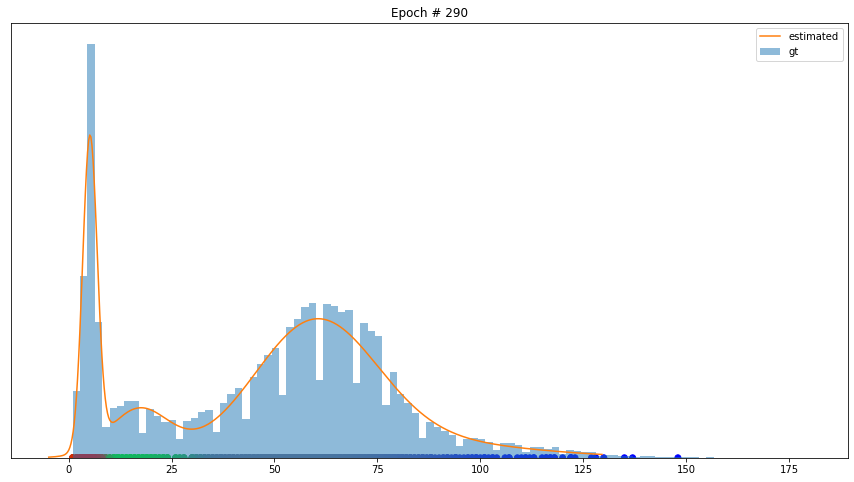

In [12]:
mu_start = np.array([5, 15, 20,  60])
s_start = np.array([1, 2, 3, 10])
w_start = np.ones_like(s_start) / len(s_start)

colors = np.array([(1, 0, 0), (0, 1, 0), (0, 0, 1), (0.5, 0.5, 0.5)])


theta = {
    'mu': mu_start,
    'sigma2': s_start,
    'w': w_start,
}

gamma = np.ones((len(samples), len(mu_start))) / len(mu_start)

idxs_to_draw_color = np.random.choice(np.arange(0, len(samples)), size=1000, replace=False)

for i in range(300):
    theta = m_step(samples, gamma, theta)
    gamma = e_step(samples, gamma, theta)
    
    if i % 10 == 0:
        x, y = get_distribution(theta, np.min(theta['mu']) - 10, np.max(theta['mu']) + 50)
        samples2draw = samples[idxs_to_draw_color]
        sample_colors = gamma[idxs_to_draw_color].dot(colors)
        sample_colors = np.clip(sample_colors, 0, 1)
        plt.figure(figsize=(15, 8))
        plt.scatter(samples2draw, np.zeros_like(samples2draw), c=sample_colors)
        plt.hist(samples, label='gt', density=True, bins=100, alpha=0.5)
        plt.plot(x, y, label='estimated')
        plt.title(f'Epoch # {i}')
        plt.yticks([])
        plt.legend()
        plt.show()


In [13]:
theta

{'w': array([0.17035414, 0.10530853, 0.1470051 , 0.57733224]),
 'mu': array([ 5.16937003, 17.03327337, 79.96346572, 59.99456784]),
 'sigma2': array([  3.11925401,  52.21223487, 754.07193777, 218.10607108])}

In [15]:
gamma[0]

array([2.81459446e-06, 3.27069856e-01, 1.14841454e-01, 5.58085875e-01])

$p(x) = \sum p(x|t)p(t)$

$\sum log(p(x|t)p(t))$

$log (\sum p(x|t)p(t))$

$z_i = (\gamma_{i1}, \dots, \gamma_{ik})$